###  installing torch and torchvision for google colab

In [0]:
!pip3 install torch torchvision

### importing libraries

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


### Downloading Fashion MNIST Dataset

In [0]:
train =torchvision.datasets.FashionMNIST('./data/train',train=True,download=True,transform=transforms.ToTensor())
test =torchvision.datasets.FashionMNIST('./data/test',train=False,download=True,transform=transforms.ToTensor())


### Plotting image

In [200]:
img=train[1751][0]
img.size()

torch.Size([1, 28, 28])

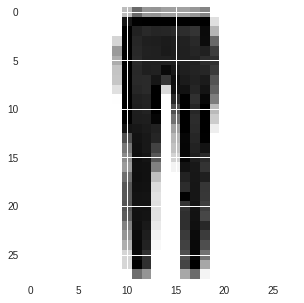

In [201]:
plt.figure(figsize=(10,5))
plt.imshow(img.reshape(28,28))

### Setting of Parameters &Hyperparameters

In [0]:
input_size=784
hidden_size=500
hidden_size2=500
no_classes=10
no_epochs=5
batch_size=64
lr=0.001

###  Making DataLoader for required batch_size

In [0]:
train_loader=torch.utils.data.DataLoader(train,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(test,batch_size=batch_size,shuffle=False)

## Making Perceptron Model with 3 hidden Layer 

In [0]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,hidden_size2,no_classes):
    super(NeuralNet,self).__init__()
    self.fc1=nn.Linear(input_size,hidden_size)
    self.relu1=nn.ReLU()
    self.fc2=nn.Linear(hidden_size,hidden_size2)
    self.relu2=nn.ReLU()
    self.fc3=nn.Linear(hidden_size2,no_classes)
    
  def forward(self,x):
    out=self.fc1(x)
    out=self.relu1(out)
    out=self.fc2(out)
    out=self.relu2(out)
    out=self.fc3(out)
    return out 
  
    

### Setting Loss function and training optimization algorithm

In [0]:
model=NeuralNet(input_size,hidden_size,hidden_size2,no_classes)

In [0]:
criterion=nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(),lr=lr)

### Training of Model

In [207]:
total_step=len(train_loader)
for epoch in range(no_epochs):
  for i, (images,labels) in enumerate(train_loader):
    images=images.reshape(-1,28*28)
    
    output=model(images)
    loss=criterion(output,labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
    if (i+1) % 100 == 0:
      
      print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, no_epochs, i+1, total_step, loss.item()))
     

Epoch [1/5], Step [100/938], Loss: 0.6787
Epoch [1/5], Step [200/938], Loss: 0.3635
Epoch [1/5], Step [300/938], Loss: 0.5542
Epoch [1/5], Step [400/938], Loss: 0.2989
Epoch [1/5], Step [500/938], Loss: 0.3533
Epoch [1/5], Step [600/938], Loss: 0.3134
Epoch [1/5], Step [700/938], Loss: 0.3859
Epoch [1/5], Step [800/938], Loss: 0.3255
Epoch [1/5], Step [900/938], Loss: 0.3585
Epoch [2/5], Step [100/938], Loss: 0.3276
Epoch [2/5], Step [200/938], Loss: 0.3157
Epoch [2/5], Step [300/938], Loss: 0.4506
Epoch [2/5], Step [400/938], Loss: 0.3853
Epoch [2/5], Step [500/938], Loss: 0.3978
Epoch [2/5], Step [600/938], Loss: 0.2615
Epoch [2/5], Step [700/938], Loss: 0.4332
Epoch [2/5], Step [800/938], Loss: 0.4289
Epoch [2/5], Step [900/938], Loss: 0.3376
Epoch [3/5], Step [100/938], Loss: 0.3861
Epoch [3/5], Step [200/938], Loss: 0.1933
Epoch [3/5], Step [300/938], Loss: 0.4976
Epoch [3/5], Step [400/938], Loss: 0.2218
Epoch [3/5], Step [500/938], Loss: 0.3795
Epoch [3/5], Step [600/938], Loss:

In [208]:
loss.detach().numpy()

array(0.34808052, dtype=float32)

In [209]:
np.array(i)

array(937)

### Evaluating Model Accuracy on Test Dataset

In [210]:
with torch.no_grad():
  correct=0
  total=0
  for (images,labels) in test_loader:
    images=images.reshape(-1,28*28)
    
    pred=model(images)
    _,predicted=torch.max(pred.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()
    
  print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
  

Accuracy of the network on the 10000 test images: 87.56 %


### Evaluating and judgement of Model Parameters 

In [211]:
correct

8756

In [212]:
total

10000

In [213]:

labels.size()

torch.Size([16])

In [214]:
model.fc1.weight.size()

torch.Size([500, 784])

In [215]:
model.fc1.bias.size()

torch.Size([500])

In [216]:
model.fc2.weight.size()

torch.Size([500, 500])

In [217]:
model.fc2.bias.size()

torch.Size([500])

In [218]:
model.fc3.weight.size()

torch.Size([10, 500])

In [219]:
model.fc3.bias

Parameter containing:
tensor([ 0.0081, -0.1317,  0.0416,  0.1014, -0.0965,  0.0132,  0.0233,  0.1232,
         0.0180, -0.2021], requires_grad=True)

In [220]:
pred

tensor([[ -0.8485,  -1.0155,  -4.0072,   4.0472,  -3.6320,  -9.8392,  -0.4033,
         -14.1552,  -4.5670, -10.4597],
        [ -0.2990,  -3.3987,   0.7084,  -3.1346,  -2.6225,  -4.6324,  -0.8321,
          -8.0553,  -2.9275,  -6.7090],
        [-12.8796, -13.2305, -13.2135, -10.3607,  -8.4419,  -2.3740, -10.5953,
           8.5901, -10.1117,  -0.0974],
        [-14.7274, -37.2845, -23.7762, -33.6620, -24.1408,  22.2453, -22.3026,
          -6.7309, -17.0681,  -9.5524],
        [ -0.0918,  -7.3715,  -3.3619,  -5.4005,  -3.9937,  -4.9823,  -0.9026,
          -5.3811,   4.6705,  -5.1906],
        [ -7.6392, -13.4314,   6.5285,  -8.8538,   4.5842, -16.9883,  -0.3892,
         -18.4993, -11.7371, -16.5340],
        [-18.2592, -47.3975, -33.7171, -48.0569, -31.6992,  27.0922, -31.5575,
          -7.3040, -28.1317,  -7.6467],
        [  0.6497,  -4.1726,   1.0413,   0.1968,  -0.6339,  -5.3621,   1.4932,
          -6.9636,  -2.0466,  -6.3151],
        [ -9.6036, -10.0157, -11.2560,  -4.4294,

In [221]:
labels

tensor([3, 2, 7, 5, 8, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 5])

In [222]:
model.fc1(images)

tensor([[-4.8189, -4.7548, -1.9322,  ..., -0.6943, -3.9771, -1.5294],
        [-3.3721, -3.9158, -3.0196,  ..., -2.8579, -3.0036, -1.1138],
        [-0.4010, -1.6793, -2.0212,  ..., -4.0937, -2.3502, -0.4540],
        ...,
        [-4.5508, -3.3418,  0.3982,  ..., -1.1389, -1.7979, -1.0271],
        [-4.2725, -3.3409, -2.0109,  ..., -1.0232, -4.4473, -1.6086],
        [ 0.4589, -0.9935, -1.1198,  ..., -3.0530, -1.2433, -0.7160]],
       grad_fn=<ThAddmmBackward>)